<a href="https://colab.research.google.com/github/AndreaMeza2800/SimulacionII/blob/main/Ejercicio_(220322).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Línea de espera con un servidor

Andrea Leticia Meza Villa

Text(0, 0.5, 'Clientes en  sistema ')

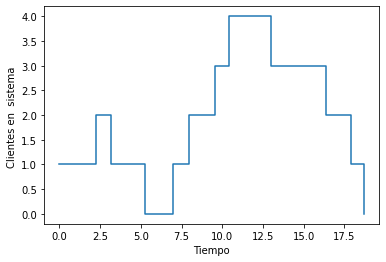

In [76]:
from random import expovariate
from math import inf as Infinity
import matplotlib.pyplot as plt

tpll = 2.0                      # Tiempo de inter arrivo promedio
tps = 2.0                       # Tiempo de servicio promedio
T = 10.0                        # Tiempo total de la simulación
t = 0.0                         # Tiempo de simulación actual
tA=expovariate(1.0/tpll)        # Tiempo de arrivo del cliente
tD = Infinity                   # Tiempo de salida del cliente
N = 0                           # Variable de estado: número de clientes en el sistema
NA=0                            # Numero de llegadas hasta el instante t
ND=0                            # Numero de salidas hasta el instante t
A=[]                            # Registro de hora de llegadas
D=[]                            # Registro de hora de salidas
X=[]                            #Tiempo
Y=[]                            #Evento 
while t <= T:
    if tA < tD:                                  # Evento de arrivo 
        t = tA        #Se mueve hasta el tiempo tA
        NA= NA + 1.0    #Llegada en el instante tA
        N = N + 1.0   #Se suma un cliente
        tA = t + expovariate(1.0/tpll)  #Tiempo del siguiente arrivo 
        if N == 1:
            tD = t + expovariate(1.0/tps) #Tiempo de de la siguiente salida
        A.append(t)
        X.append(t)
        Y.append(N)
    else:                                                    # Evento de salida
        t = tD
        N = N - 1.0  #Se va el cliente 
        ND= ND+1.0    #Salida en el instante tD
        if N > 0:
            tD = t + expovariate(1.0/tps)
        else:
            tD = Infinity
        D.append(t)
        X.append(t)
        Y.append(N)

while N>0: # t > T  #Termina el tiempo de simulación (Ya no recibe mas arrivo de clientes)
  t=tD
  N=N-1 #Salen ultimos clientes
  ND= ND+1.0
  if N > 0:
    tD = t + expovariate(1.0/tps)
  else:
    tD = Infinity
  D.append(t)
  X.append(t)
  Y.append(N)

#Ya ha salido ultimo cliente 
#print("Tiempos de llegada")
#print(A)
#print("Tiempos de salida")
#print(D)
Tp=t-T
#print("Tiempo de salida despues de tiempo de servicio")
#print(Tp)
plt.plot(X, Y, drawstyle='steps-post')
plt.xlabel('Tiempo')
plt.ylabel('Clientes en  sistema ')
#print(X)
#print(Y)